In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import pickle

# Contagion Model Flow
For this contagion model, the PAL of the neighbors will be used taking it from the original data set. So all the graphs need to be loaded, and the value of the PAL to be used is the PAL of the participants. 

Some possible problems:
1. Nodes without PAL for that specific day
2. Isolated nodes
3. Still need to normalize the PALs (create a function for that)
4. Where to pick up the neighbors PALs

In [2]:
# Initiate csv file
activities = pd.read_csv('./data_set_input/activities_first_plan.csv')
activities['date'] = pd.to_datetime(activities['date'])
activities['goal_achieved'] = activities['pal']/activities['target_pal']
activities.loc[ activities['goal_achieved']==np.inf, 'goal_achieved'] = np.nan
del activities['Unnamed: 0']

In [39]:
graphs = pickle.load(open('./data_set_input/list_graphs.pickle','rb'))

In [4]:
len(graphs)

100

In [40]:
delta = 1.0
openn = 0.5
exp = 0.5
model='weighted'

In [29]:
count = 0
isolatedNodes = []

#for node in graphs[0].nodes():
#    g.node[node]['pal'] = {0 : g.node[node]['initial_goal']}

In [42]:
for node in graphs[0].nodes():
    graphs[0].node[node]['pal'] = {0 : graphs[0].node[node]['initial_goal']}
    
for t in np.arange(1,len(graphs)):
    g_pre = graphs[t-1]
    g_t = graphs[t]
    #print t
    
    # List of previous nodes
    nodes_pre = list(graphs[t-1].nodes())
    
    for node in graphs[t].nodes():
        # If it is an existing node, copy it
        if node in nodes_pre:
            graphs[t].node[node]['pal'] = graphs[t-1].node[node]['pal']
        # If it is a new node, initialize it!
        else:
            graphs[t].node[node]['pal'] = {t : graphs[t].node[node]['initial_goal']}
    # Counting isolated nodes
    isolatedNodes.append((t, count))
    count = 0
    
    for node in graphs[t].nodes():
        # If it is a new node, skip
        if node not in nodes_pre:
            continue
        # coefficient to calculate the aggimpact
        cs = 0.0
        aggimpact = 0.0
        speed_factor = 0.0
        # Take the neighbors for the time t-1 (new nodes does influence for next step)
        num_neighbours = len(graphs[t-1].neighbors(node))
        
        if num_neighbours == 0:
            count += 1
        # Calculate speed factor based on time t-1
        # The values for exp and openn in comments are the way to use a different value for each agent
        for neigh in graphs[t-1].neighbors(node):
            #exp = graph.node[neigh]['expressivenness']
            connect = 1 #g.get_edge_data(neigh,node).values()[0]
            #openn = graph.node[node]['openness']
            wba = exp * connect * openn
            speed_factor = speed_factor + wba
            cs = cs +  exp * connect
        # Calculate the qStart (or aggimpact)
        for neigh in graphs[t-1].neighbors(node):
            #exp = graph.node[neigh]['expressivenness']
            connect = 1 #graph.get_edge_data(neigh, node).values()[0]
            try:
                # It has a copy of the previous date - taking the second argument of the tuple ([1])
                v_neigh = graphs[t-1].node[neigh]['pal'][t-1]
            except:
                print 'Node ' + str(neigh) + '\n'
                raw_input()
            if cs == 0:
                aggimpact = 0
            else:
                aggimpact = aggimpact + (exp * connect * v_neigh)/cs
        try:
            old_pal = graphs[t-1].node[node]['pal'][t-1]
        except:
            print node, g[t-1].node[node]['pal']
            raw_input()
        # Definition of the speed factor
        if model == 'original':
            new_pal = old_pal + speed_factor * (aggimpact - old_pal)*delta
        elif model == 'weighted':
            if num_neighbours == 0:
                new_pal = old_pal
            else:
                new_pal = old_pal + (speed_factor / num_neighbours) * (aggimpact - old_pal) * delta
        elif model == 'logistic':
            new_pal = old_pal + logistic(speed_factor) * (aggimpact - old_pal) * delta
        else:
            print 'Wrong value for model!'
            raw_input()
        graphs[t].node[node]['pal'][t] = new_pal

In [45]:
 len(graphs)

100

In [71]:
graphs[39].node['9135']

{'bmi': 23.5304,
 'corporation': 907,
 'country': 'US',
 'dropout_date': 'nan',
 'gender': 'F',
 'initial_goal': 0.86471670133200007,
 'pal': {13: 0.86471670133200007,
  14: 0.86471670133200007,
  15: 0.86471670133200007,
  16: 0.86471670133200007,
  17: 0.86471670133200007,
  18: 0.86471670133200007,
  19: 0.86471670133200007,
  20: 0.86471670133200007,
  21: 0.86471670133200007,
  22: 0.86471670133200007,
  23: 0.86471670133200007,
  24: 0.86471670133200007,
  25: 0.86471670133200007,
  26: 0.86471670133200007,
  27: 0.86471670133200007,
  28: 0.86471670133200007,
  29: 0.86471670133200007,
  30: 0.86471670133200007,
  31: 0.86471670133200007,
  32: 0.86471670133200007,
  33: 0.86471670133200007,
  34: 0.86471670133200007,
  35: 0.86471670133200007,
  36: 0.86471670133200007,
  37: 0.86471670133200007,
  38: 0.86471670133200007,
  39: 0.86471670133200007,
  40: 0.86471670133200007,
  41: 0.86471670133200007,
  42: 0.86471670133200007,
  43: 0.86471670133200007,
  44: 0.86471670133200

731

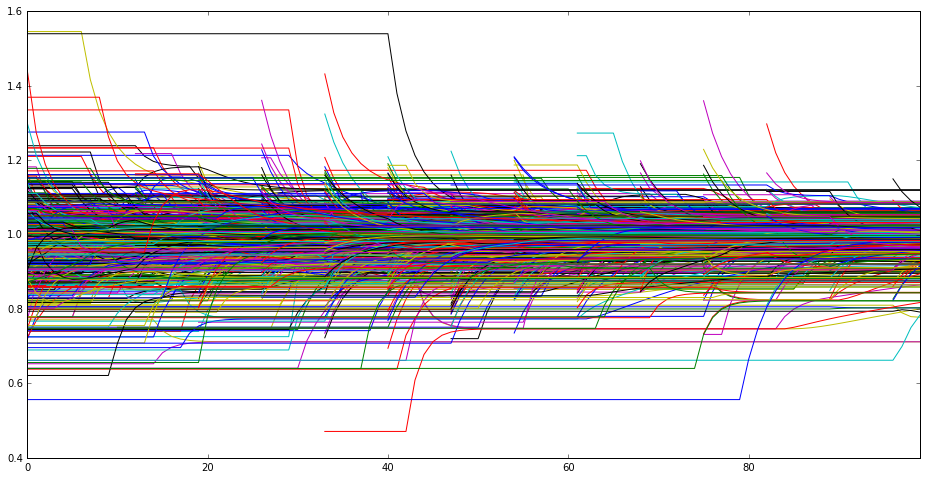

In [70]:
count = 0
for node in graphs[98].nodes():
    if len(graphs[98].neighbors(node)) != 0:
        pd.Series(graphs[98].node[node]['pal']).plot(figsize=(16,8))
    else: count+=1
count

In [68]:
#%matplotlib inline
len(graphs[98].nodes())

2853

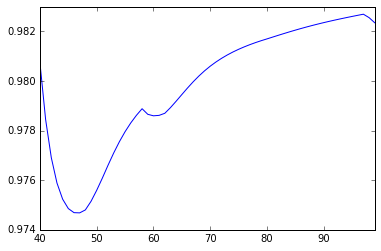

In [62]:

df.plot()